<a href="https://colab.research.google.com/github/sauravkumar19/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
netflix_data = df.copy()

In [5]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Our dataset have 12 columns and 7787 rows. 

In [7]:
netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
def remove_nan_value(df,th = 40.0):
  
  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step2
  duplicates = len(df[df.duplicated()])
  print('Duplicate value present in data is', duplicates)
  df.drop_duplicates(inplace=True,ignore_index=True)

  numeric_column = df.describe().columns
  cateogorical_column = df.describe(include = 'object').columns

  for item in null_percentage.iteritems():
    if (item[0] in cateogorical_column) and (item[1] != 0):
      frequency = df[item[0]].value_counts().sort_values(ascending = False)
      if frequency[0]/len(df) > 0.3:
        df[item[0]].fillna(frequency.index[0], inplace = True)
      else:
        df[item[0]].fillna('unknown',inplace = True)

    if (item[0] in numeric_column) and (item[1] != 0):
      df[item[0]].fillna(df[item[0]].mean(), inplace = True)

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)  

We create a function which check the null value present in the column and remove the columns which contain more than 60% null value. It also replace the  NaN value from mode value if the frequency of mode in the column is greater than 30% otherwise replace it by other for categorical value. For numeric value nan value is replace by mean value. 

In [9]:
remove_nan_value(netflix_data)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
Duplicate value present in data is 0
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description

## Feature engineering

In [10]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings)

In [11]:
netflix_data['month'] = netflix_data['date_added'].apply(lambda x: x.split()[0])
netflix_data['min and season'] = netflix_data['duration'].apply(lambda x: float(x.split()[0]))

Here we add new column target_ages using rating column on the basis of which age group person are suitable for watch that movie.

We extract the month from the release date and add new column month.

Add duration column using min and season column.

## EDA

Text(0, 0.5, 'Frequency')

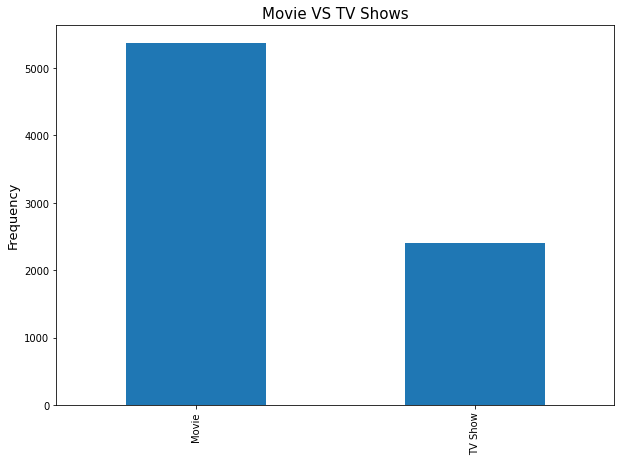

In [12]:
netflix_data['type'].value_counts().plot(kind = 'bar', figsize = (10,7))
plt.title('Movie VS TV Shows',fontsize = 15)
plt.ylabel('Frequency',fontsize = 13)

**INFERENCE:**

Generally Movies are more released than TV shows.

In [13]:
shows_movie = netflix_data.groupby('release_year')['type'].value_counts().unstack()
shows_movie.fillna(0,inplace = True)
shows_movie

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2017,744.0,268.0
2018,734.0,387.0
2019,582.0,414.0


Text(0, 0.5, 'Frequency')

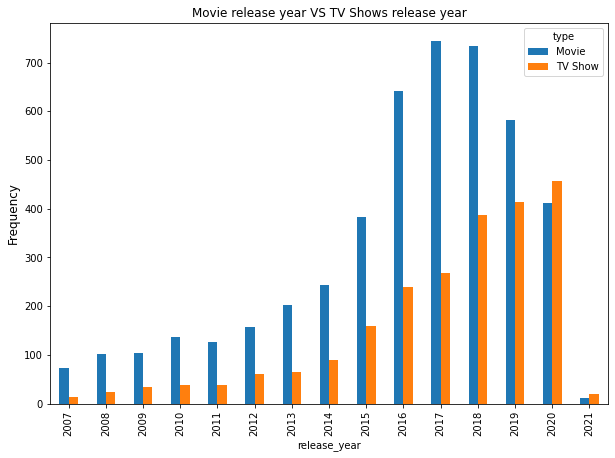

In [14]:
shows_movie.tail(15).plot(kind = 'bar', figsize = (10,7))
plt.title('Movie release year VS TV Shows release year',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)

**INFERENCE:**

Frequency of Tv shows incrases exponently. So Netflix focus more in TV Shows rather than movies in recent years.

In 2020, Lockdown time netflix releases more TV Shows than movies.

In [15]:
movie_rate = netflix_data.groupby('rating')['type'].value_counts().unstack()
movie_rate.fillna(0,inplace = True)
movie_rate

type,Movie,TV Show
rating,,
G,39.0,0.0
NC-17,3.0,0.0
NR,79.0,5.0
PG,247.0,0.0
PG-13,386.0,0.0
R,663.0,2.0
TV-14,1272.0,659.0
TV-G,111.0,83.0
TV-MA,1850.0,1020.0


Text(0, 0.5, 'Frequency')

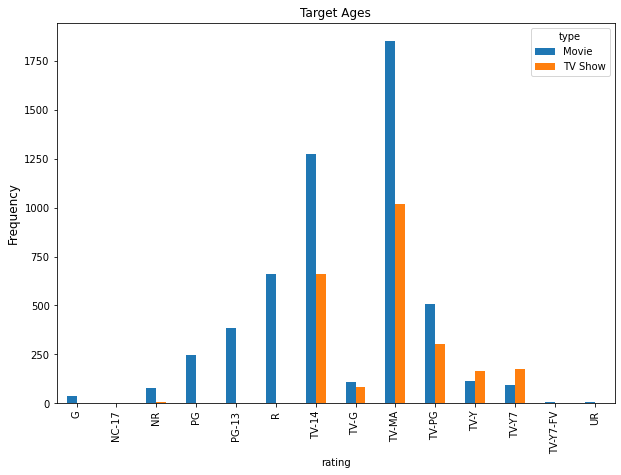

In [16]:
movie_rate.plot(kind = 'bar',figsize = (10,7))
plt.title('Target Ages',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)

In [17]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,min and season
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,August,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,December,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,December,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,November,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,January,123.0


In [18]:
movie_time = netflix_data.loc[netflix_data['type'] == 'Movie', 'min and season']
movie_time

1        93.0
2        78.0
3        80.0
4       123.0
6        95.0
        ...  
7781     88.0
7782     99.0
7783    111.0
7784     44.0
7786     90.0
Name: min and season, Length: 5377, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


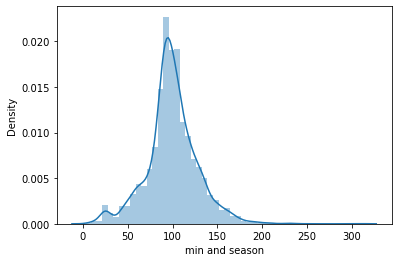

In [19]:
sns.distplot(movie_time)

Text(0, 0.5, 'Frequency')

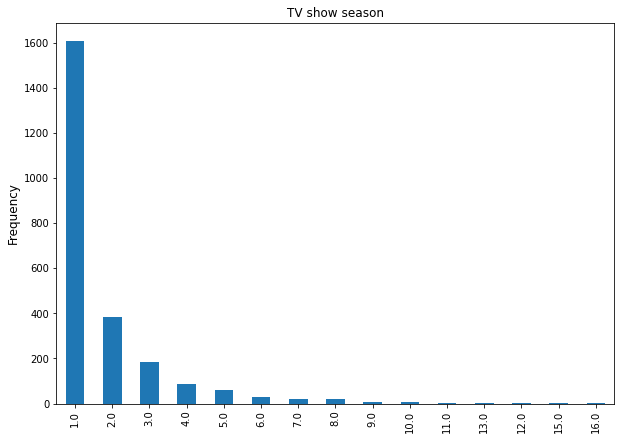

In [20]:
movie_time = netflix_data.loc[netflix_data['type'] == 'TV Show', 'min and season']
movie_time.value_counts().plot(kind = 'bar',figsize = (10,7))
plt.title('TV show season',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)

**INFRENCE**

Most of the movies have duration of  between 50 to 150

Highest number of tv_shows consistig of  single season


In [21]:
features = ['type','cast','country','target_ages','listed_in','month','min and season','title','rating']
cast_table = netflix_data[features]
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title,rating
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,4.0,3%,TV-MA
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",December,93.0,7:19,TV-MA
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies",December,78.0,23:59,R
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...",November,80.0,9,PG-13
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,January,123.0,21,PG-13


In [22]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(lambda x: x.split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
def explode_column(df,column):
  if column == 'listed_in':
    df = df.explode(column)
    df[column] = df[column].apply(lambda x: x.split('&'))
    df = df.explode(column)
    # df[column] = df[column].apply(lambda x: x.split()[0] if x.split()[0] != 'TV' else x.split()[1])
  elif column == 'country':
    df = df.explode(column)
    df.index = range(0,len(df))
    blank_index = df[df[column] == ''].index
    df = df.drop(blank_index)
  else:
    df = df.explode(column)

  return df



In [24]:
cast_table.shape

(7787, 9)

In [25]:
t1 = explode_column(cast_table,'listed_in')

In [26]:
def remove_unwanted_space(string):
  if (string[0] == ' ') and (string[-1] == ' '):
    return string[1:-1]
  elif string[0] == ' ':
    return string[1:]
  elif string[-1] == ' ':
    return string[:-1]
  else:
    return string

In [27]:
t1['listed_in'] = t1['listed_in'].apply(remove_unwanted_space)

In [28]:
t1

,type,cast,country,target_ages,listed_in,month,min and season,title,rating
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,International TV Shows,August,4.0,3%,TV-MA
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,TV Dramas,August,4.0,3%,TV-MA
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,TV Sci-Fi,August,4.0,3%,TV-MA
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,Fantasy,August,4.0,3%,TV-MA
1,Movie,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],Adults,Dramas,December,93.0,7:19,TV-MA
...,...,...,...,...,...,...,...,...,...
7785,TV Show,"[Adriano Zumbo, Rachel Khoo]",[Australia],Older Kids,International TV Shows,October,1.0,Zumbo's Just Desserts,TV-PG
7785,TV Show,"[Adriano Zumbo, Rachel Khoo]",[Australia],Older Kids,Reality TV,October,1.0,Zumbo's Just Desserts,TV-PG
7786,Movie,[unknown],"[United Kingdom, Canada, United States]",Adults,Documentaries,March,90.0,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,TV-MA
7786,Movie,[unknown],"[United Kingdom, Canada, United States]",Adults,Music,March,90.0,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,TV-MA


In [29]:
t3 = t1.groupby('title')['listed_in'].value_counts().unstack()
t3.fillna(0,inplace = True)
t3


listed_in,Action,Adventure,Anime Features,Anime Series,British TV Shows,Children,Classic,Classic Movies,Comedies,Crime TV Shows,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi,TV Shows,TV Thrillers,Talk Shows,Teen TV Shows,Thrillers
title,,,,,,,,,,,,,,,,,,,,,
#Alive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
#AnneFrank - Parallel Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#FriendButMarried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#FriendButMarried 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Roxy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
忍者ハットリくん,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
海的儿子,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
마녀사냥,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [31]:
t3.columns

Index(['Action', 'Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children', 'Classic', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Cult TV', 'Documentaries',
       'Docuseries', 'Dramas', 'Faith', 'Family Movies', 'Fantasy',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music', 'Musicals', 'Nature TV', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi', 'Science',
       'Spanish-Language TV Shows', 'Spirituality', 'Sports Movies',
       'Stand-Up Comedy', 'TV Action', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi', 'TV Shows', 'TV Thrillers', 'Talk Shows',
       'Teen TV Shows', 'Thrillers'],
      dtype='object', name='listed_in')

In [32]:
t3.iloc[1073]

listed_in
Action                       0.0
Adventure                    0.0
Anime Features               0.0
Anime Series                 0.0
British TV Shows             0.0
Children                     0.0
Classic                      0.0
Classic Movies               0.0
Comedies                     0.0
Crime TV Shows               1.0
Cult Movies                  0.0
Cult TV                      0.0
Documentaries                0.0
Docuseries                   0.0
Dramas                       0.0
Faith                        0.0
Family Movies                0.0
Fantasy                      0.0
Horror Movies                0.0
Independent Movies           0.0
International Movies         0.0
International TV Shows       0.0
Kids' TV                     0.0
Korean TV Shows              0.0
LGBTQ Movies                 0.0
Movies                       0.0
Music                        0.0
Musicals                     0.0
Nature TV                    0.0
Reality TV                   0.0


In [33]:
# define a function which return same genre movie
def simliar_movie(movie_name):
  genre = t3.index
  similar_dict = {}
  for j in genre:
    if movie_name != j:
      a = np.array(t3.loc[movie_name])
      b = np.array(t3.loc[j])
      similartiy = cosine_similarity(a, b)
      similar_dict[j] = similartiy
  
  value_list = list(similar_dict.values())
  key_list = list(similar_dict.keys())
  movie_list = []
  c = 0
  for i in range(value_list.count(1)):
    movies = key_list[value_list.index(1,c+1,len(value_list))]
    movie_list.append(movies)
    c = value_list.index(1,c+1,len(value_list))
  return movie_list


In [34]:
simliar_movie('Breaking Bad')


['Dare Me',
 'Designated Survivor',
 'Ozark',
 'The Assassination of Gianni Versace',
 'The Blacklist',
 'The Lizzie Borden Chronicles']

In [35]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(remove_unwanted_space)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
def genre_wise_eda(df,column1,column2):

  df = explode_column(df,column1)
  df[column1] = df[column1].apply(remove_unwanted_space)
  column1_total_genre = df[column1].value_counts()
  column1_total_genre.index.name = column1
  column1_total_genre.name = column2

  df = explode_column(df,column2)
  df[column2] = df[column2].apply(remove_unwanted_space)

  column1_genre = df.groupby(column1)[column2].value_counts()
  column1_unique = df[column1].unique()

  column1_genre_dict = {}
  for items in column1_unique:
    column1_tuple = column1_genre[items].to_dict()
    column1_genre_dict[items] = column1_tuple

  column1_genre = pd.Series(column1_genre_dict)
  column1_genre.index.name = column1
  column1_genre.name = 'genre'


  t2 = pd.merge(column1_genre,column1_total_genre,right_index = True,left_index = True).sort_values(by = column2, ascending=False).head(10)
  
  


  if t2.index[0] == 'unknown':
    t2[1:].plot(kind = 'bar', figsize = (10,7))
    plt.title(column1,fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
    for iter,row in t2['genre'][1:].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  else:
    t2.plot(kind = 'bar', figsize = (10,7))
    plt.title(column1,fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
    for iter,row in t2['genre'].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  return t2

,genre,listed_in
cast,,
unknown,"{'Documentaries': 380, 'Docuseries': 173, 'Int...",718
Anupam Kher,"{'International Movies': 37, 'Dramas': 28, 'Co...",42
Shah Rukh Khan,"{'International Movies': 32, 'Dramas': 28, 'Co...",35
Om Puri,"{'International Movies': 27, 'Dramas': 19, 'Co...",30
Naseeruddin Shah,"{'Dramas': 26, 'International Movies': 25, 'Co...",30
Takahiro Sakurai,"{'Anime Series': 21, 'International TV Shows':...",29
Akshay Kumar,"{'International Movies': 27, 'Dramas': 15, 'Co...",29
Yuki Kaji,"{'Anime Series': 16, 'International TV Shows':...",27
Amitabh Bachchan,"{'International Movies': 22, 'Dramas': 20, 'Ac...",27


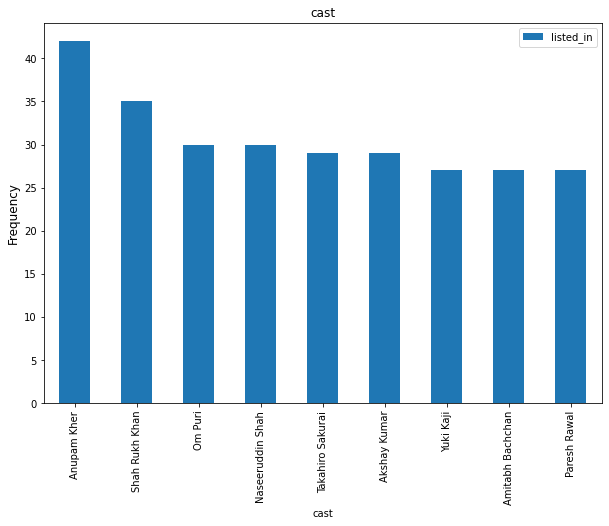

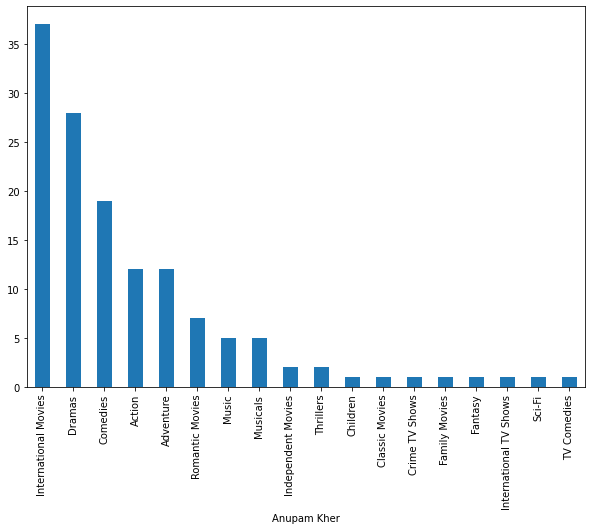

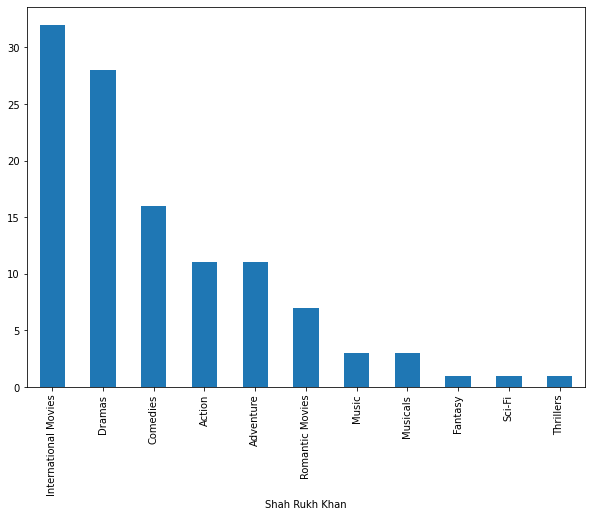

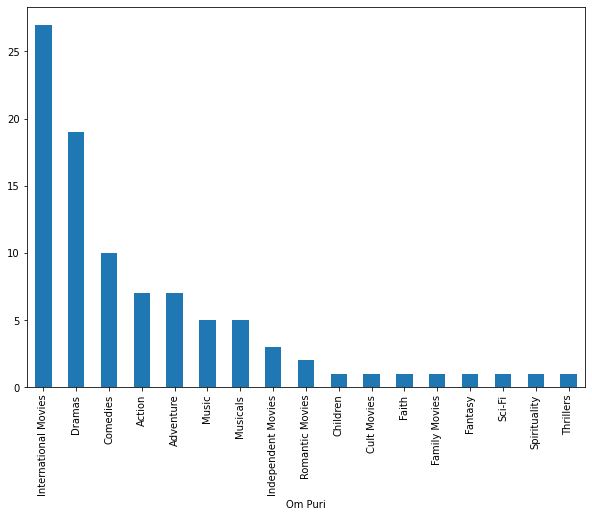

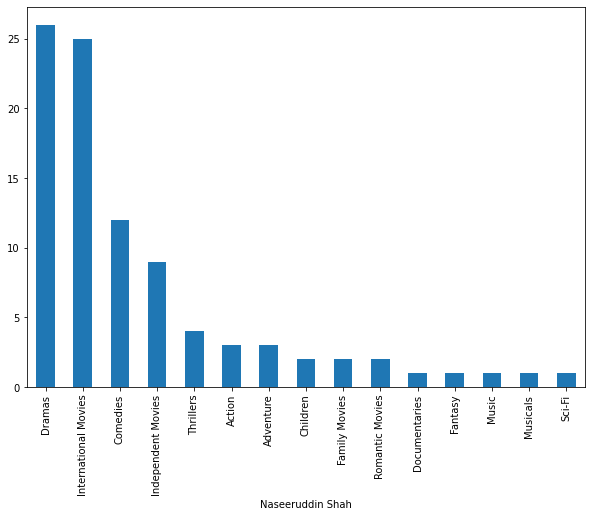

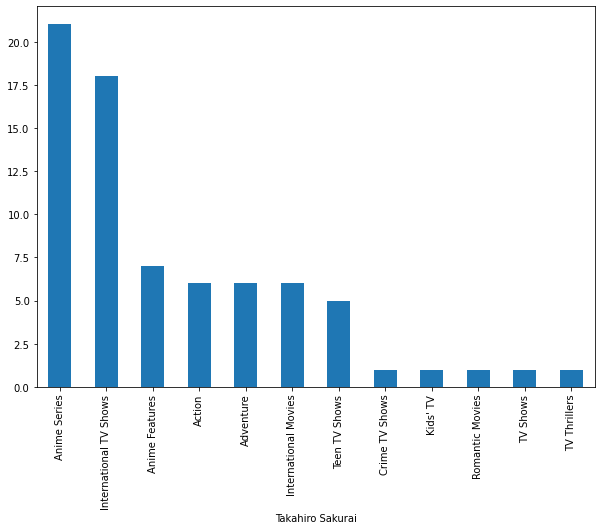

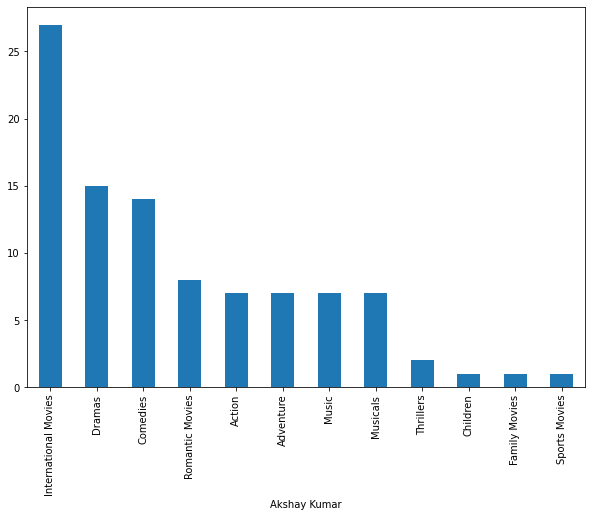

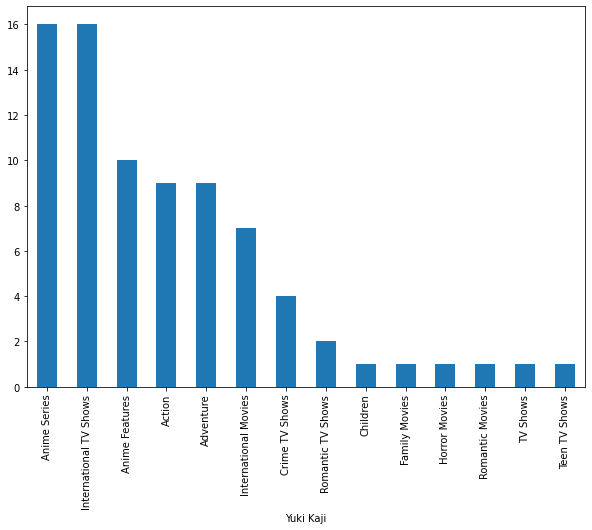

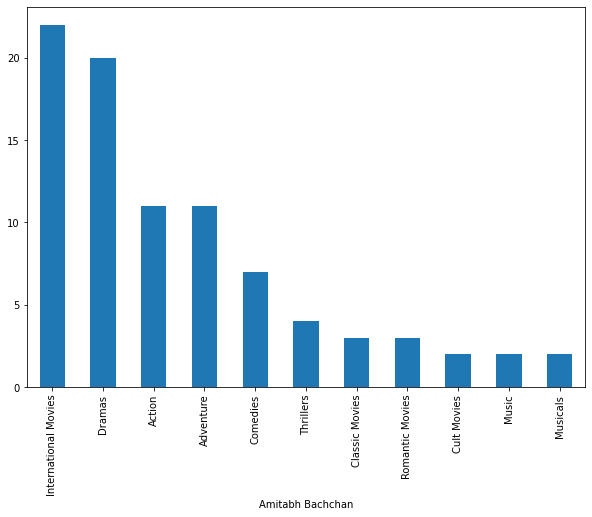

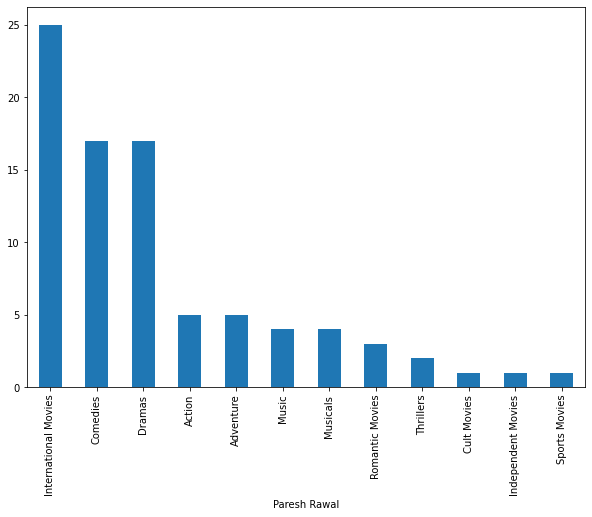

In [37]:
genre_wise_eda(cast_table,'cast','listed_in')

**INFRENCE**

Anupam Kher and  Shah Rukh Khan are worked in most of the movie present our netflix dataset. One can also notice most of indian actor prefer dramas and comdies type of movie.

Yuki kali and takahrio sakurai are two actor other than indian in top 10.Both prefer Anime series or Anime movie.

Very few indian actor work on any Tv shows and series, this means famous indian actor prefer movies more than tv series.

,genre,listed_in
country,,
United States,"{'Dramas': 760, 'Comedies': 630, 'Documentarie...",3804
India,"{'International Movies': 828, 'Dramas': 626, '...",990
United Kingdom,"{'British TV Shows': 212, 'Dramas': 156, 'Inte...",723
Canada,"{'Comedies': 81, 'Dramas': 71, 'Children': 68,...",412
France,"{'International Movies': 191, 'Dramas': 145, '...",349
Japan,"{'International TV Shows': 139, 'Anime Series'...",287
Spain,"{'International Movies': 130, 'Dramas': 73, 'I...",215
South Korea,"{'International TV Shows': 139, 'Korean TV Sho...",212
Germany,"{'International Movies': 82, 'Dramas': 68, 'Co...",199


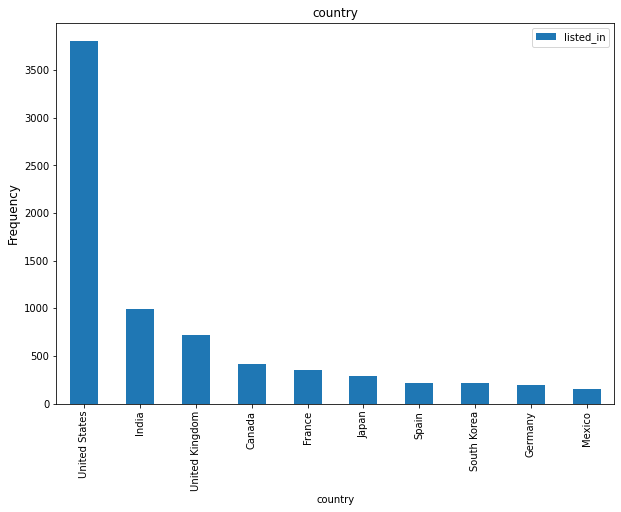

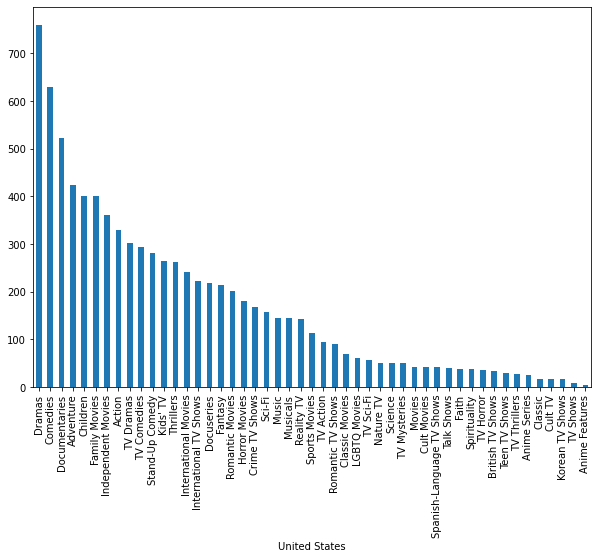

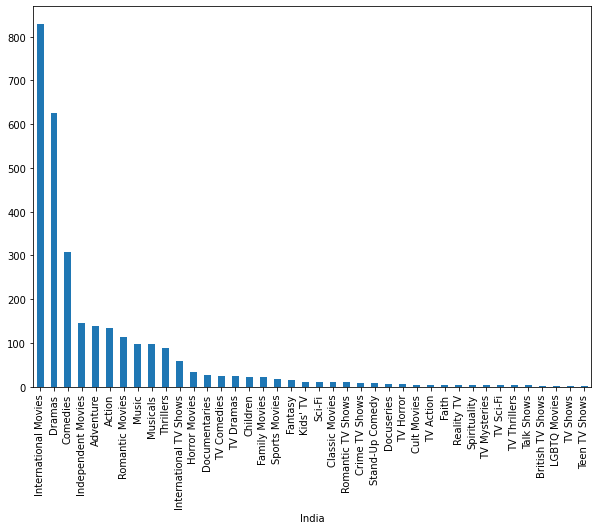

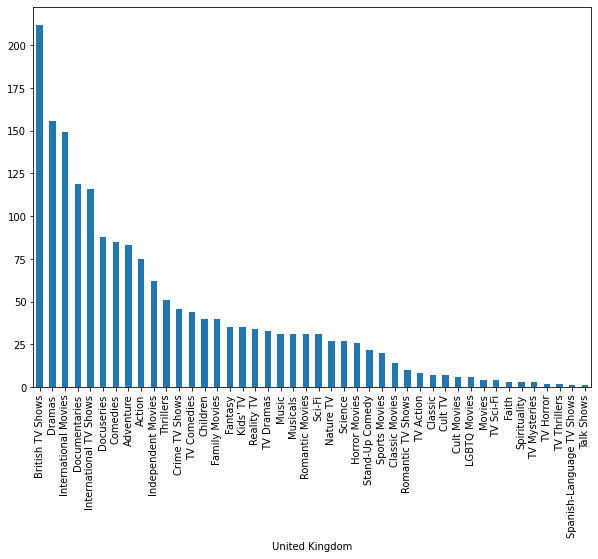

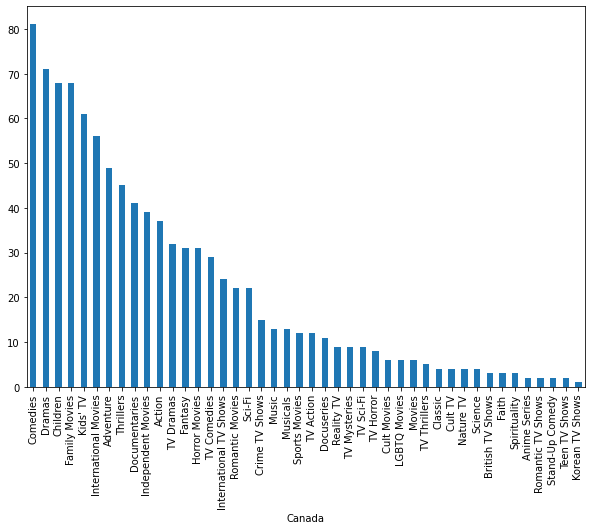

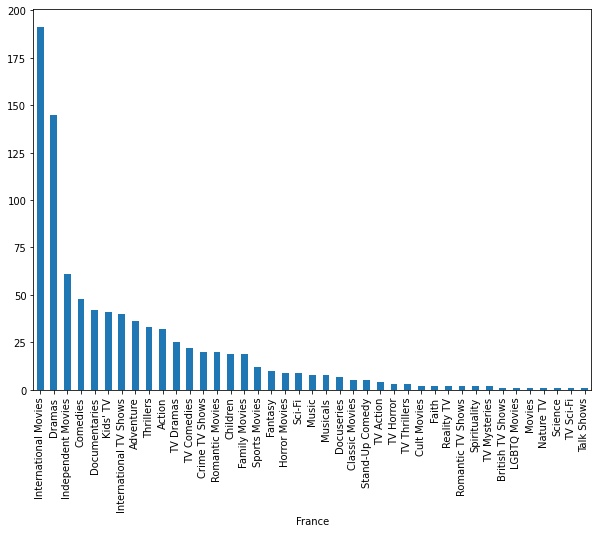

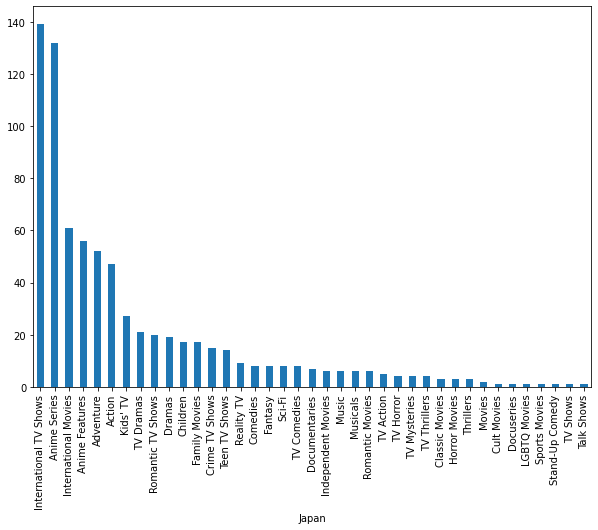

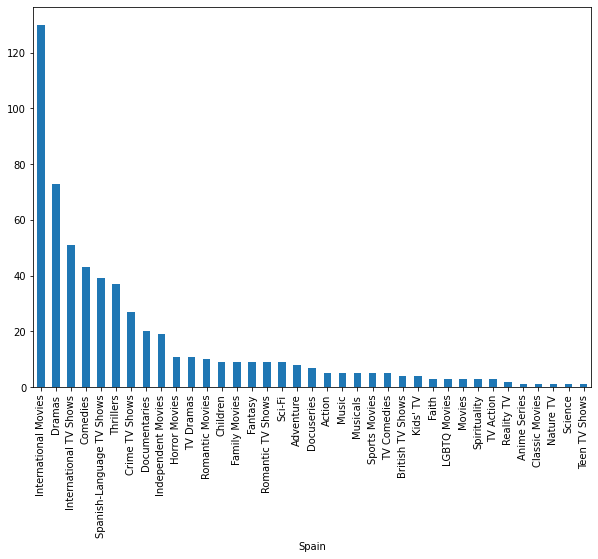

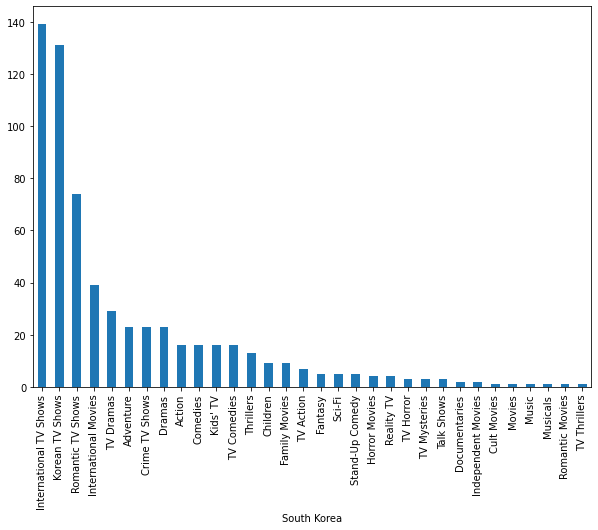

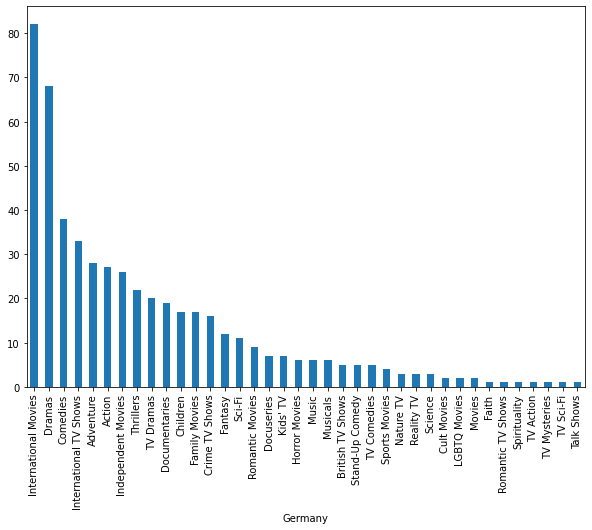

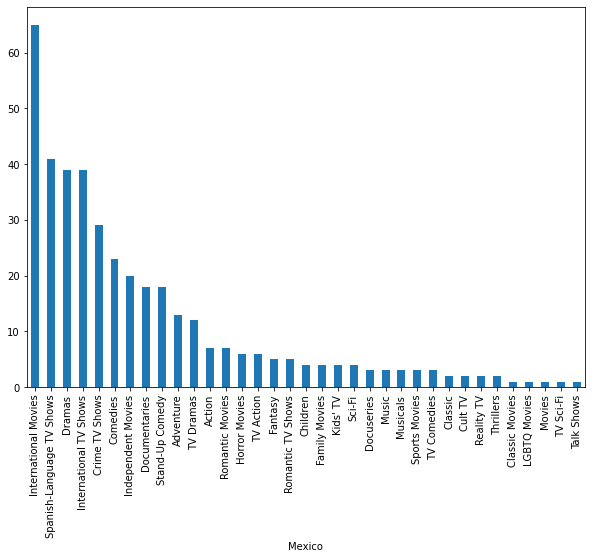

In [38]:
genre_wise_eda(cast_table,'country','listed_in')

**INFRENCE**

United states has the highest number of  content on the netflix ,followed by india.

* In united state drama, comedies and documentaries movies are most popular.
* In India, France and Germany  drama and comedies documentaries content are most popular.
* Children movie and kid's tv shows are most popular in canada, whereas british tv shows are most popular in UK.
* Anime series and feature are most popular in japan. Romantic and korean tv series are most popular in south korea.


,genre,rating
country,,
United States,"{'TV-MA': 1197, 'TV-14': 600, 'R': 541, 'TV-PG...",3804
India,"{'TV-14': 542, 'TV-MA': 246, 'TV-PG': 142, 'TV...",990
United Kingdom,"{'TV-MA': 237, 'R': 120, 'TV-14': 97, 'TV-PG':...",723
Canada,"{'TV-MA': 100, 'R': 68, 'TV-14': 47, 'TV-Y': 4...",412
France,"{'TV-MA': 152, 'R': 49, 'TV-14': 43, 'PG-13': ...",349
Japan,"{'TV-MA': 96, 'TV-14': 85, 'TV-PG': 47, 'TV-Y7...",287
Spain,"{'TV-MA': 156, 'TV-14': 18, 'R': 11, 'TV-PG': ...",215
South Korea,"{'TV-MA': 88, 'TV-14': 73, 'TV-PG': 18, 'TV-Y7...",212
Germany,"{'TV-MA': 71, 'R': 36, 'PG-13': 25, 'TV-14': 2...",199


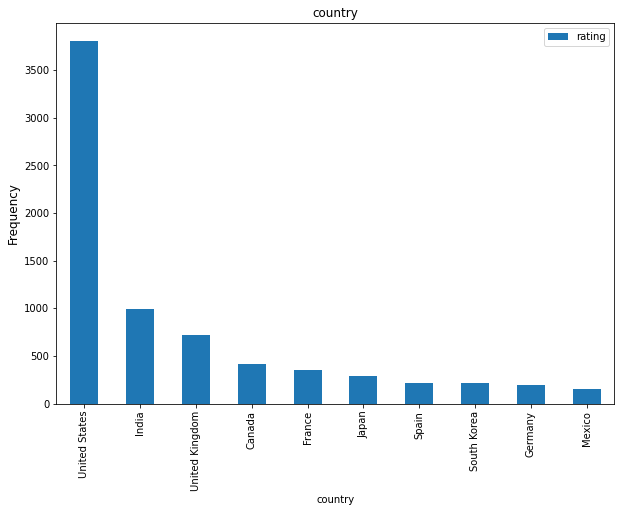

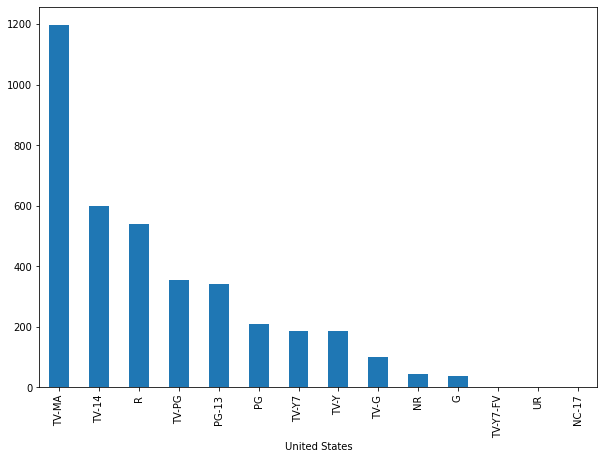

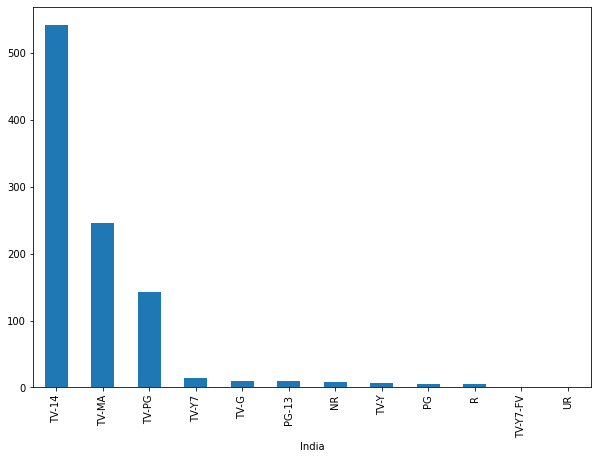

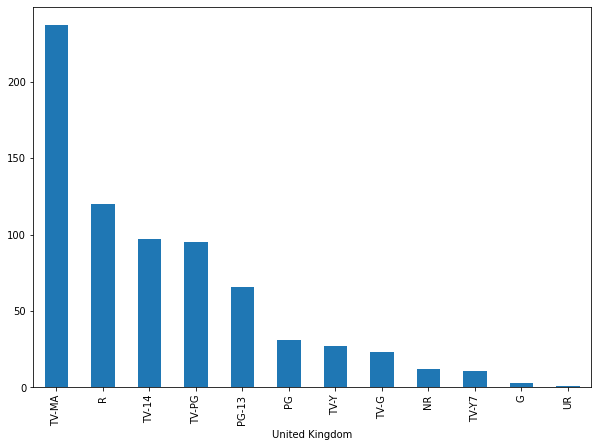

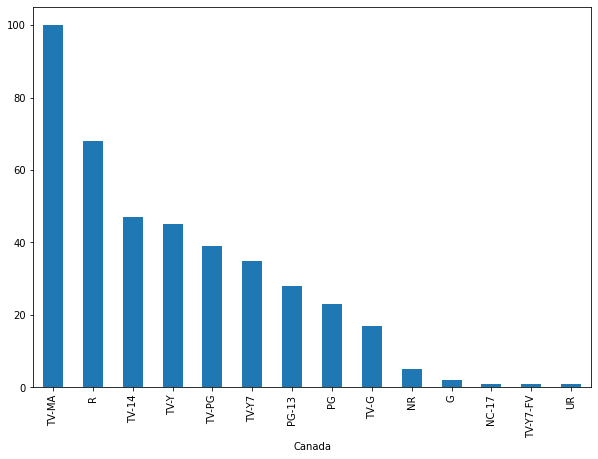

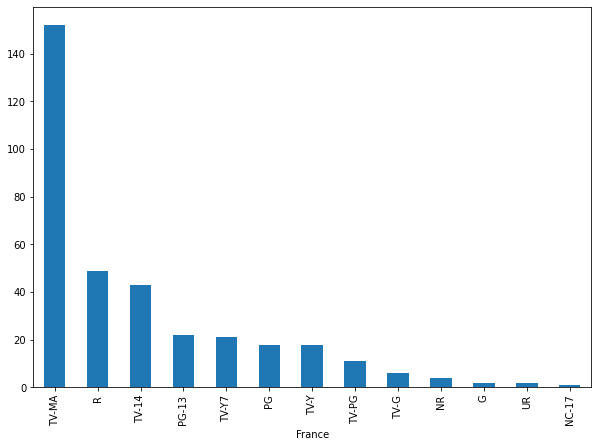

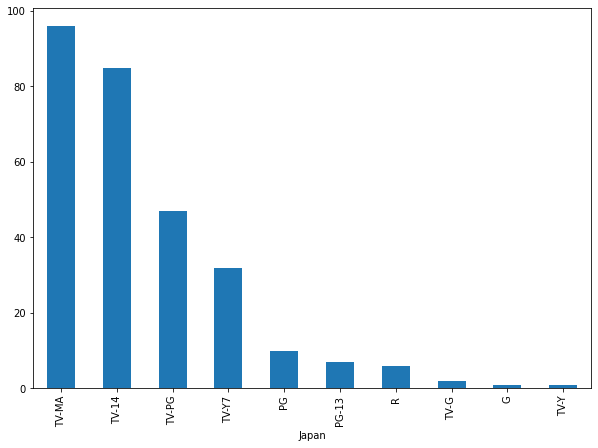

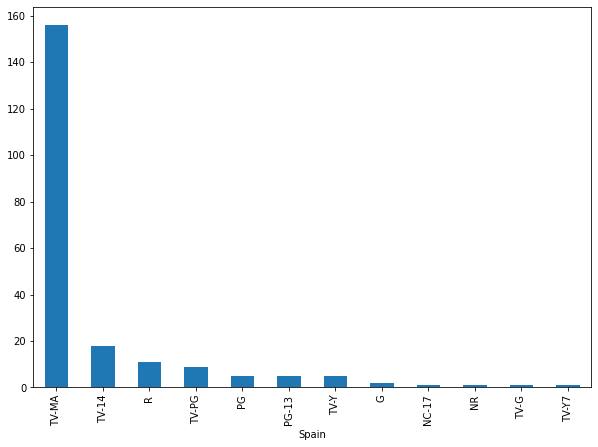

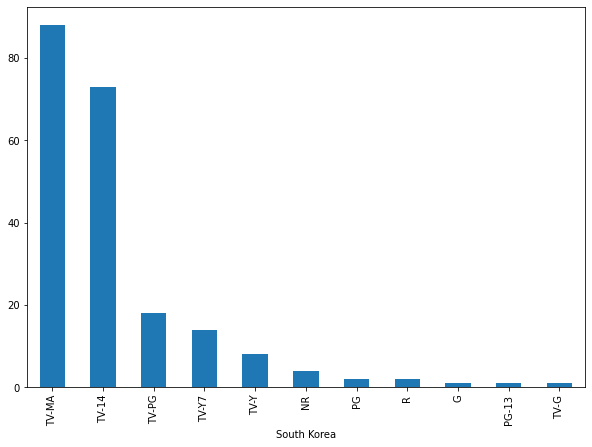

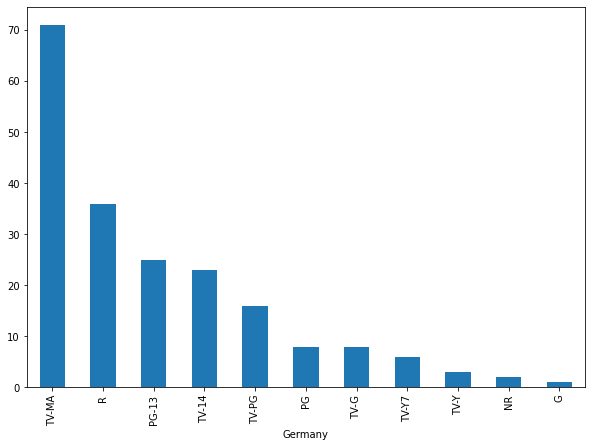

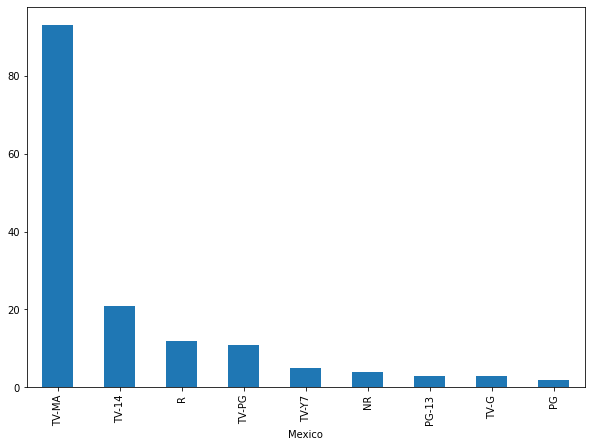

In [39]:
genre_wise_eda(cast_table,'country','rating')

In [40]:
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title,rating
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,"[International TV Shows, TV Dramas, TV Sci-F...",August,4.0,3%,TV-MA
1,Movie,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],Adults,"[Dramas, International Movies]",December,93.0,7:19,TV-MA
2,Movie,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],Adults,"[Horror Movies, International Movies]",December,78.0,23:59,R
3,Movie,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],Teens,"[Action & Adventure, Independent Movies, Sci...",November,80.0,9,PG-13
4,Movie,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],Teens,[Dramas],January,123.0,21,PG-13


,genre,target_ages
cast,,
unknown,"{'Adults': 309, 'Teens': 181, 'Older Kids': 15...",718
Anupam Kher,"{'Teens': 28, 'Older Kids': 8, 'Adults': 6}",42
Shah Rukh Khan,"{'Teens': 26, 'Older Kids': 6, 'Adults': 3}",35
Om Puri,"{'Teens': 13, 'Older Kids': 10, 'Adults': 7}",30
Naseeruddin Shah,"{'Teens': 16, 'Adults': 9, 'Older Kids': 4, 'K...",30
Takahiro Sakurai,"{'Adults': 14, 'Teens': 11, 'Older Kids': 4}",29
Akshay Kumar,"{'Teens': 17, 'Older Kids': 10, 'Adults': 2}",29
Yuki Kaji,"{'Adults': 12, 'Teens': 12, 'Older Kids': 3}",27
Amitabh Bachchan,"{'Teens': 18, 'Older Kids': 5, 'Adults': 4}",27


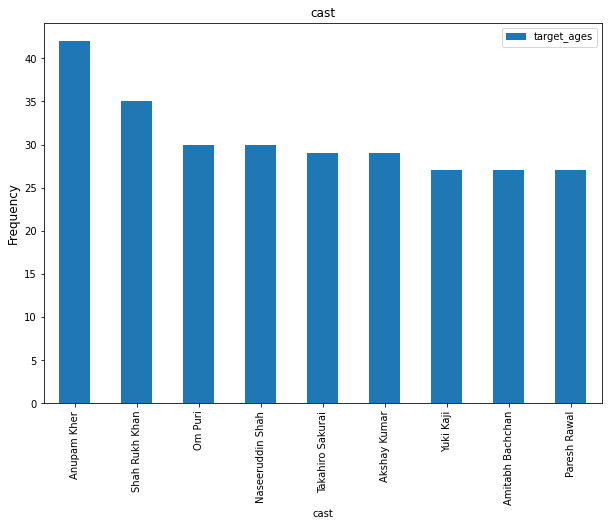

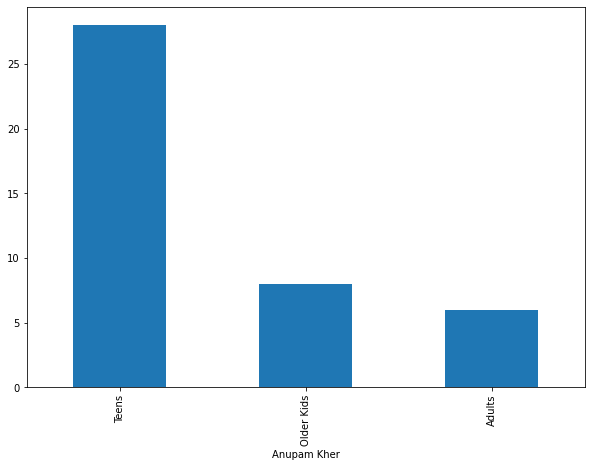

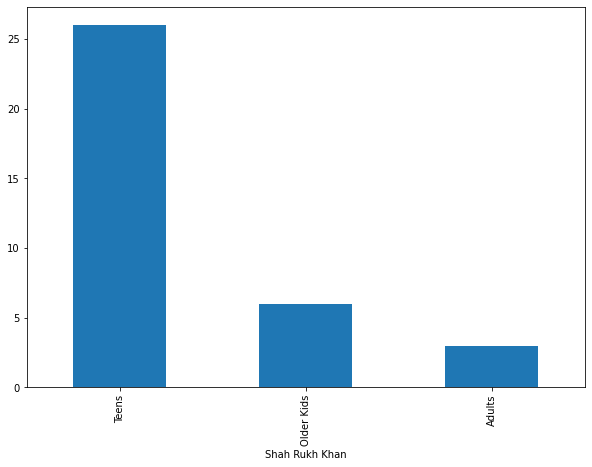

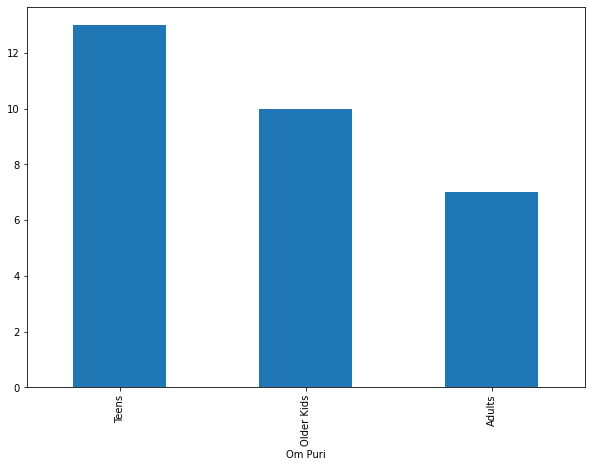

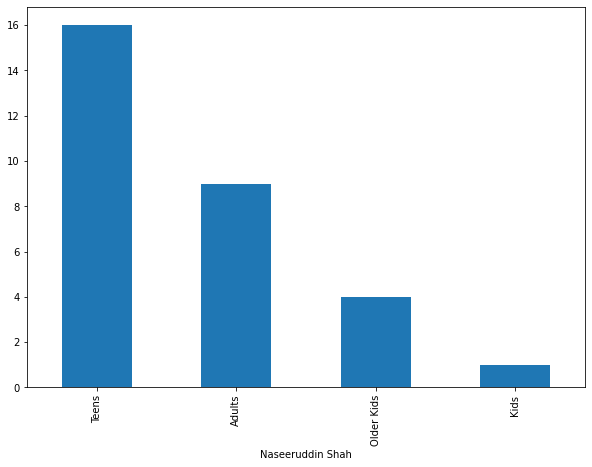

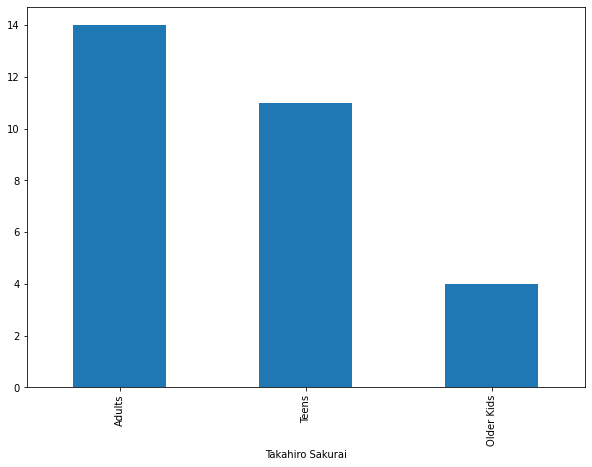

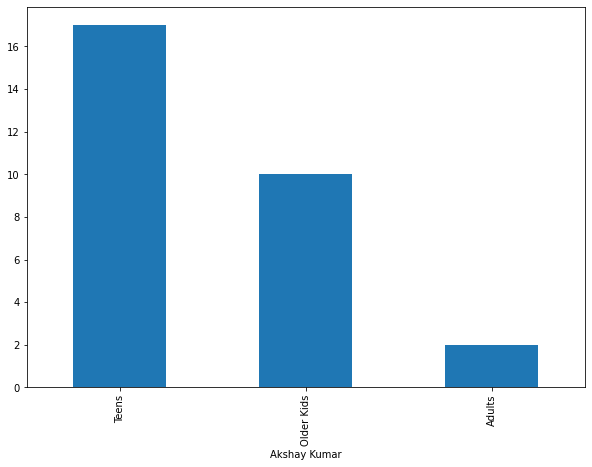

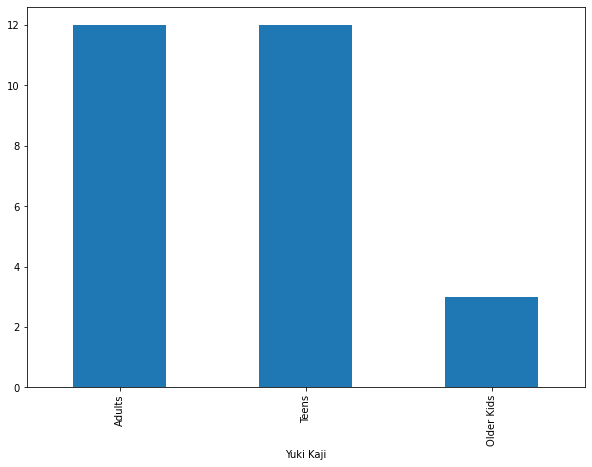

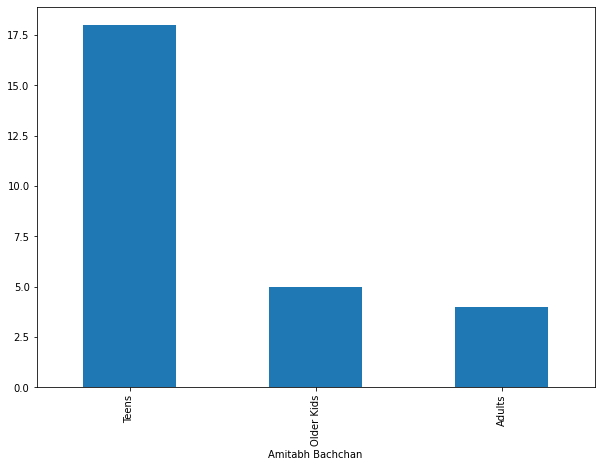

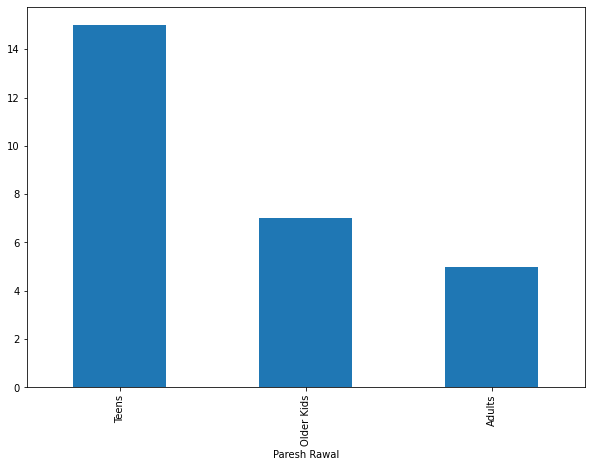

In [41]:
genre_wise_eda(cast_table,'cast','target_ages')

,genre,type
country,,
United States,"{'Movie': 2661, 'TV Show': 1143}",3804
India,"{'Movie': 915, 'TV Show': 75}",990
United Kingdom,"{'Movie': 467, 'TV Show': 256}",723
Canada,"{'Movie': 286, 'TV Show': 126}",412
France,"{'Movie': 265, 'TV Show': 84}",349
Japan,"{'TV Show': 184, 'Movie': 103}",287
Spain,"{'Movie': 158, 'TV Show': 57}",215
South Korea,"{'TV Show': 157, 'Movie': 55}",212
Germany,"{'Movie': 157, 'TV Show': 42}",199


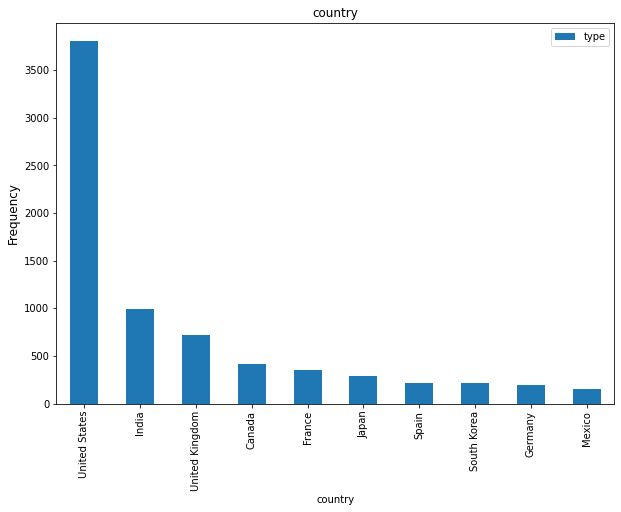

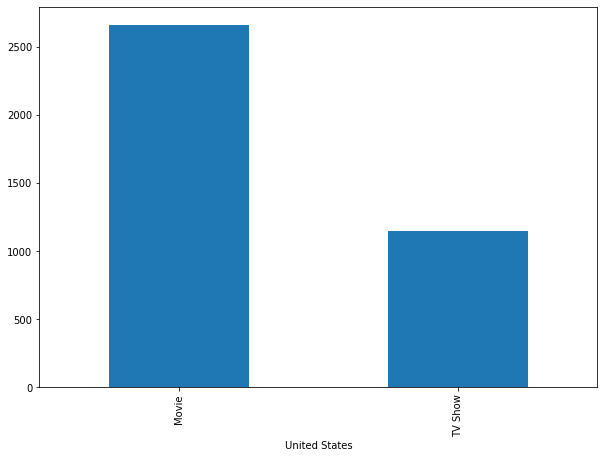

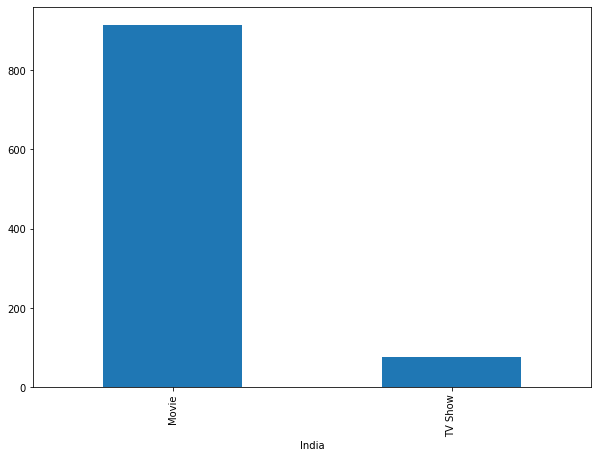

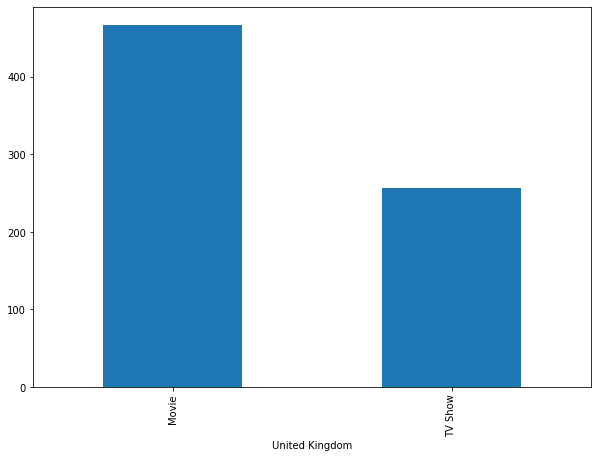

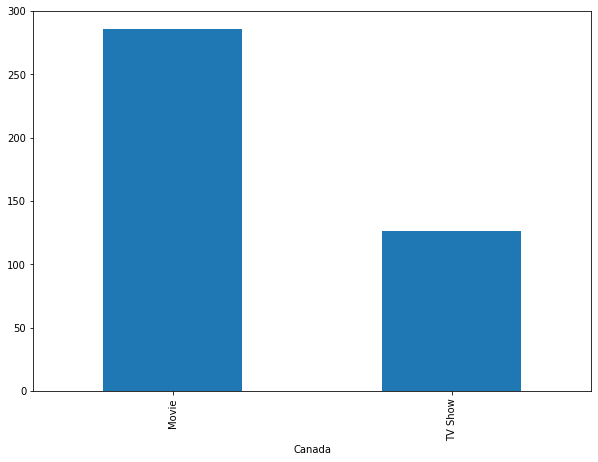

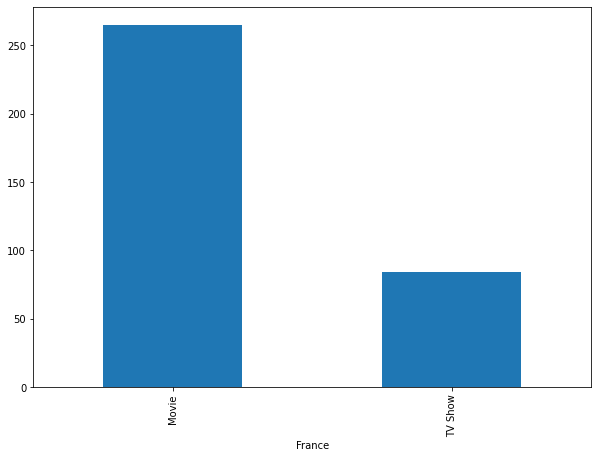

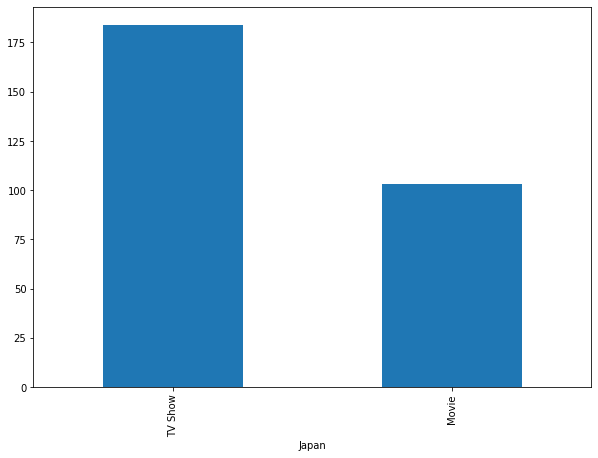

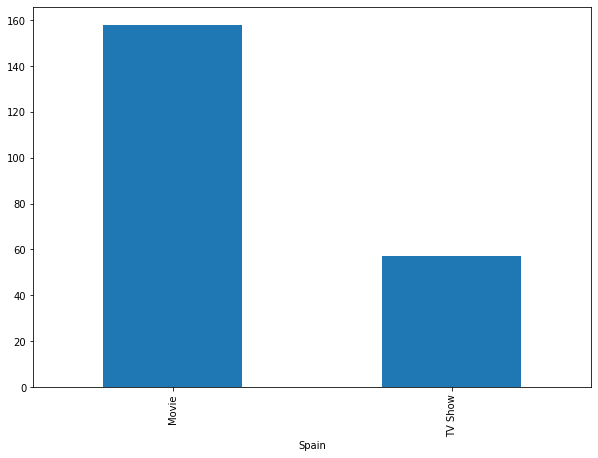

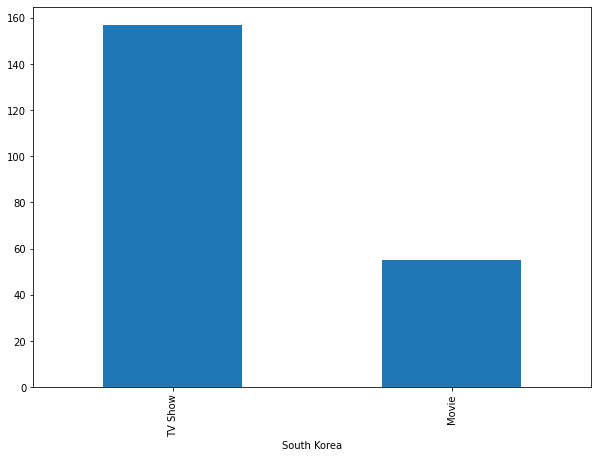

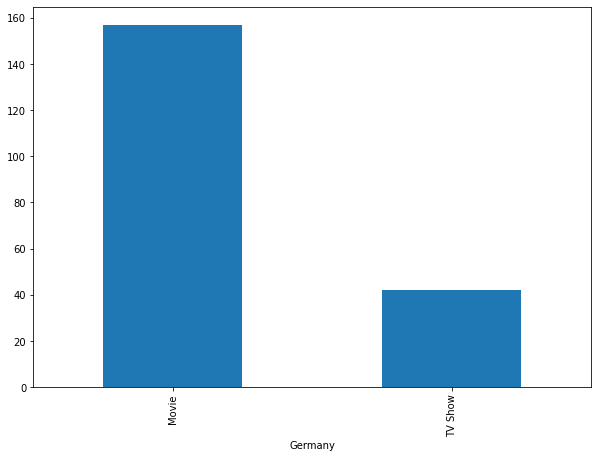

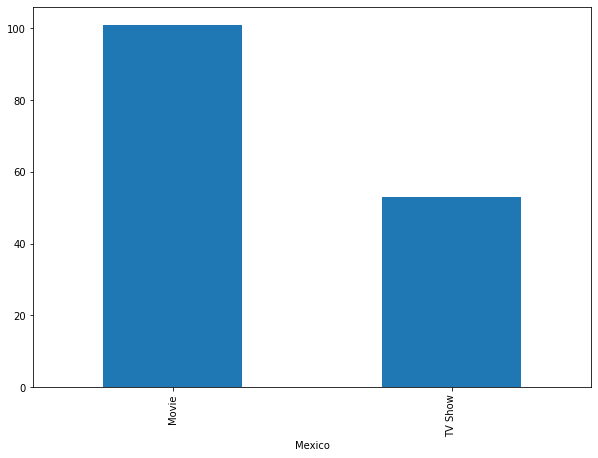

In [42]:
genre_wise_eda(cast_table,'country','type')

,genre,month
country,,
United States,"{'January': 467, 'November': 390, 'December': ...",3804
India,"{'December': 121, 'October': 113, 'March': 102...",990
United Kingdom,"{'October': 81, 'January': 80, 'December': 75,...",723
Canada,"{'November': 54, 'December': 45, 'October': 43...",412
France,"{'January': 48, 'October': 39, 'December': 34,...",349
Japan,"{'December': 39, 'September': 32, 'January': 3...",287
Spain,"{'July': 28, 'January': 25, 'June': 20, 'Novem...",215
South Korea,"{'December': 25, 'February': 22, 'October': 22...",212
Germany,"{'January': 35, 'July': 20, 'November': 19, 'A...",199


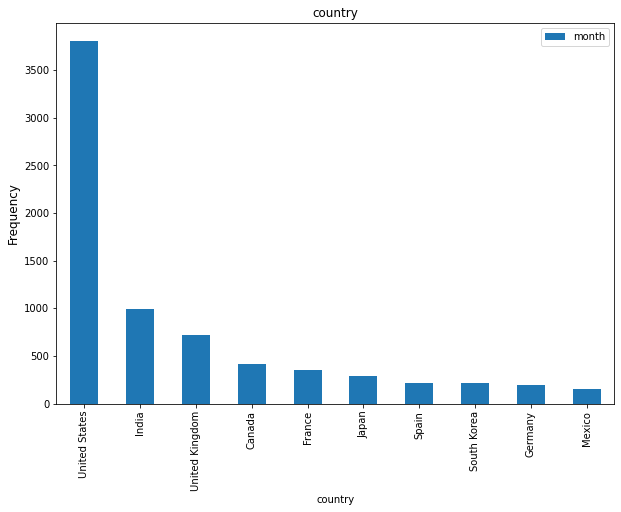

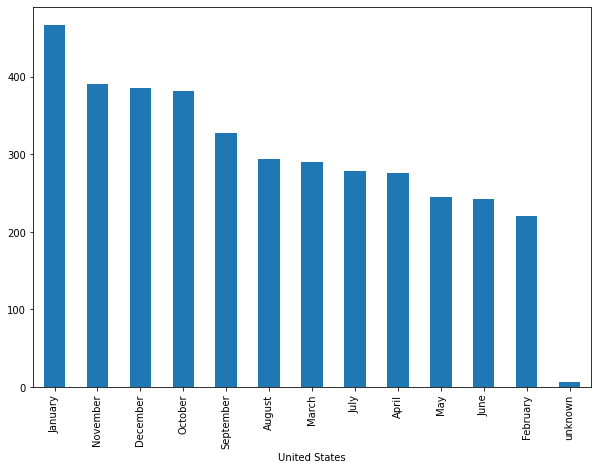

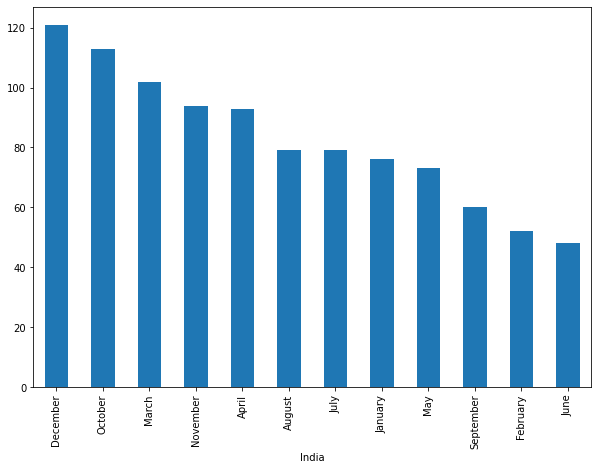

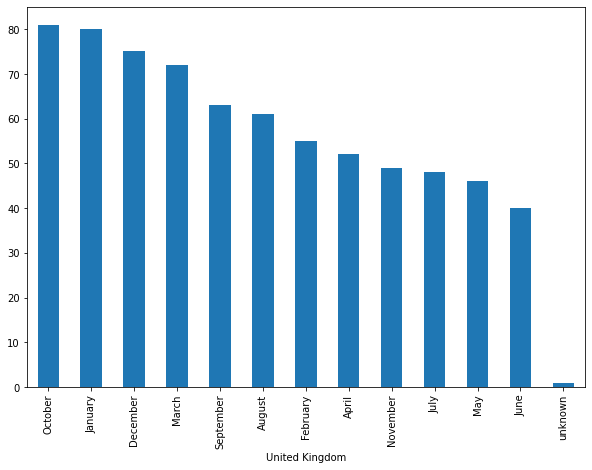

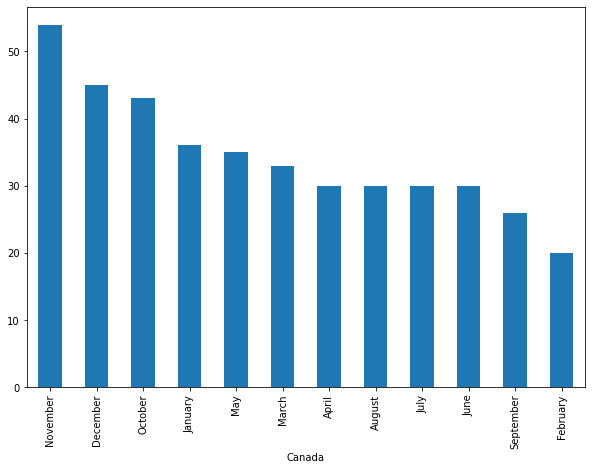

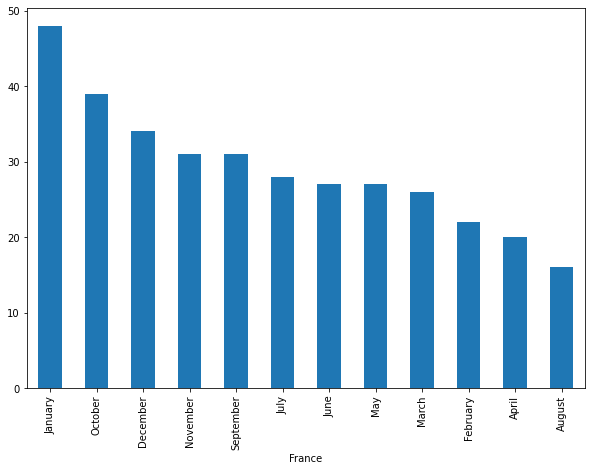

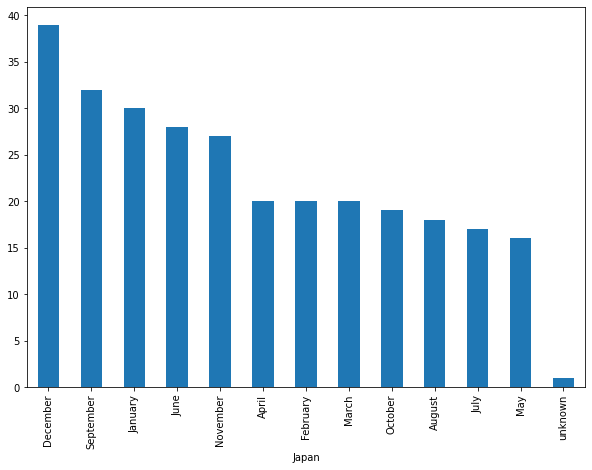

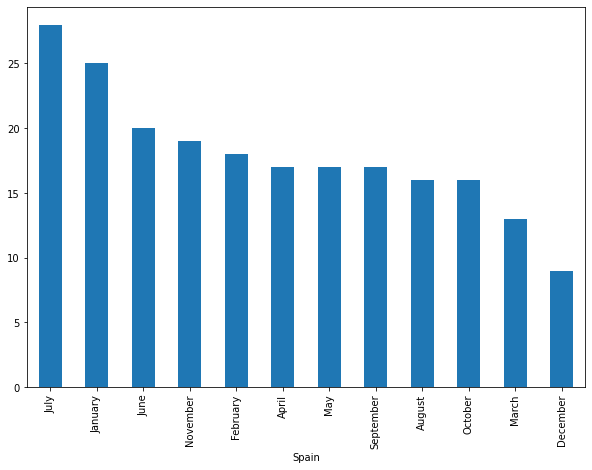

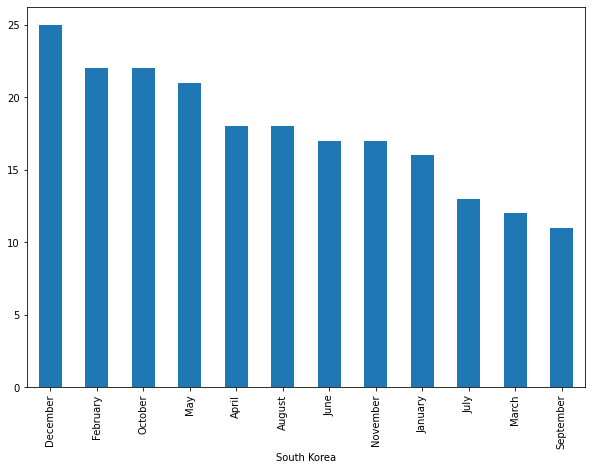

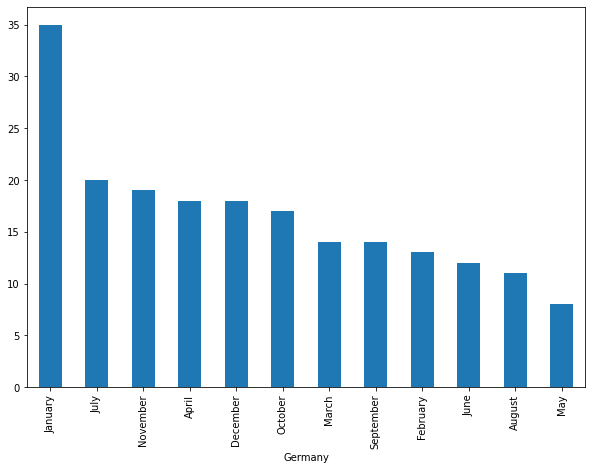

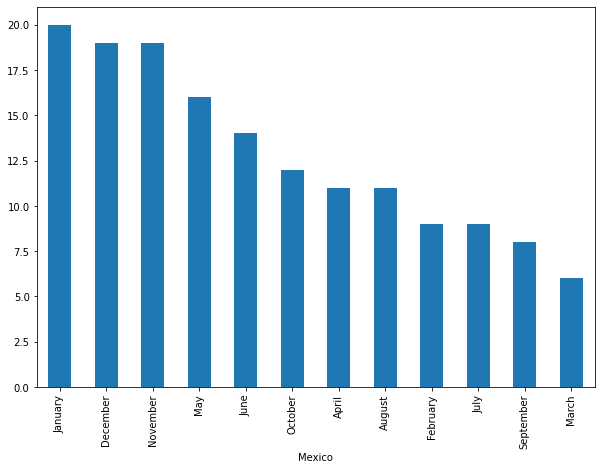

In [43]:
genre_wise_eda(cast_table,'country','month')

In [44]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,min and season
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,August,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,December,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,December,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,November,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,January,123.0


In [45]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [46]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [47]:
a = netflix_data['description'][0]
a

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [48]:
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer
lemmatizer = WordNetLemmatizer()
def text_preprocessing(text):
  text = re.sub("[^a-zA-Z0-9' ]", "", text)
  text = re.sub(r'who\'ll', 'who will', text)
  text = re.sub(r'[wW]ouldn\'t', 'would not', text)
  text = re.sub(r'[mM]mustn\'t', 'must not', text)
  text = re.sub(r'[tT]hat\'s', 'that is', text)
  text = text.lower()
  text = [lemmatizer.lemmatize(word) for word in text.split() if word not in sw]

  return " ".join(text)
  

In [49]:
text_preprocessing(a)

'future elite inhabit island paradise far crowded slum get one chance join 3 saved squalor'

In [50]:
netflix_data['preprocessed_description'] = netflix_data['description'].apply(text_preprocessing)

In [51]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,min and season,preprocessed_description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,August,4.0,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,December,93.0,devastating earthquake hit mexico city trapped...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,December,78.0,army recruit found dead fellow soldier forced ...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,November,80.0,postapocalyptic world ragdoll robot hide fear ...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,January,123.0,brilliant group student become cardcounting ex...


In [52]:
tifid = TfidfVectorizer(max_df = 0.7,min_df = 3, ngram_range=(1,1))
X = tifid.fit_transform(netflix_data['preprocessed_description'])

In [53]:
vocab = tifid.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
array = X.todense()

In [55]:
data_frame = pd.DataFrame(array)
data_frame

,0,1,2,3,4,5,6,7,8,9,...,6138,6139,6140,6141,6142,6143,6144,6145,6146,6147
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.294783,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
words_value = np.sum(X,axis = 0)
word_index = np.flip(np.argsort(words_value)[0:],1)
word_value = np.flip(np.sort(words_value)[0:],1)
top_15_words = np.zeros((15,words_value.shape[1]))
for i in range(15):
  top_15_words[i,word_index[0,i]] = 1


In [57]:
top_words = [word[0] for word in tifid.inverse_transform(top_15_words)]
top_word_value = word_value[0,:15].tolist()[0]


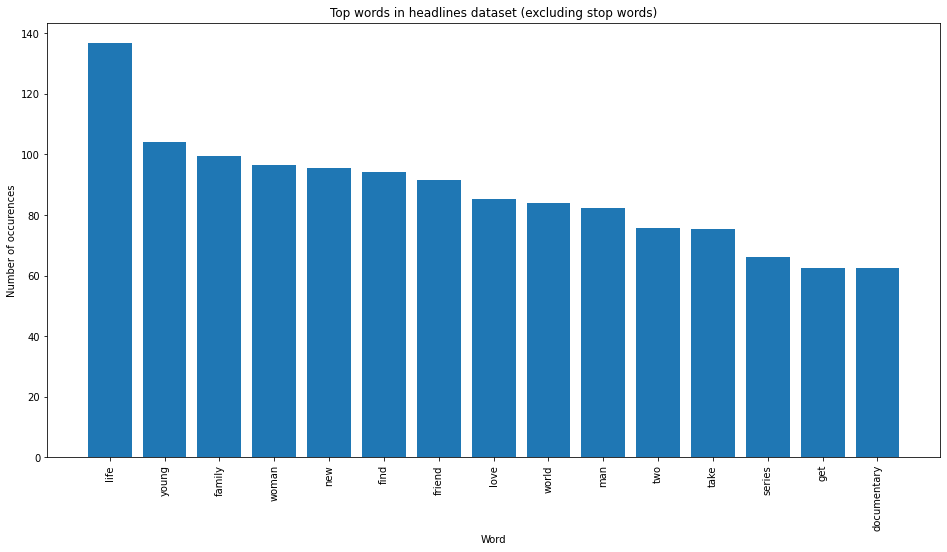

In [58]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(top_words)), top_word_value)
ax.set_xticks(range(len(top_words)))
ax.set_xticklabels(top_words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [59]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 10.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=905c874ea64f28b9b44266b0eaa926974881c571c7b0deff24452c543b329955
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=162f088a36f42928cc087ff934eb2c64a9627c0759a67d1badcb814f79a72d7a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [60]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [61]:
# LDA model
lda = LatentDirichletAllocation(random_state = 0)

In [62]:
lda.fit(X)

LatentDirichletAllocation(random_state=0)

In [63]:
lda_panel = pyLDAvis.sklearn.prepare(lda, X,tifid,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      32.420952   8.115230       1        1  11.853227
1       0.648955  71.707100       2        1  11.779166
5      71.019684   9.971006       3        1  10.815038
3       3.785981  33.185135       4        1  10.766553
7     -42.666500  -9.222070       5        1  10.346200
4      -3.621689 -43.526516       6        1  10.067055
9      -3.632402  -4.171708       7        1   9.634360
8     -36.584400  35.804413       8        1   8.667995
6      44.391380  50.615383       9        1   8.240190
0      40.235809 -31.591665      10        1   7.830216, topic_info=           Term       Freq      Total Category  logprob  loglift
5133    standup  26.000000  26.000000  Default  30.0000  30.0000
1104   comedian  25.000000  25.000000  Default  29.0000  29.0000
1006  christmas  16.000000  16.000000  Default  28.0000  28.0000
4705      santa   7.000000   7.000000  Default  27.0000  27.0000
5077    special  33.000000  33.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
4909       show   3.605658  32.855328  Topic10  -6.3685   0.3376
5680        two   3.866201  62.447437  Topic10  -6.2987  -0.2349
6057      woman   3.859365  79.303410  Topic10  -6.3005  -0.4756
5471      three   3.605548  41.797375  Topic10  -6.3685   0.0968
2432      group   3.591918  40.091844  Topic10  -6.3723   0.1347

[853 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         6  0.193014         10
1         7  0.579043         10
1         8  0.193014         10
11        5  0.448325  13yearold
44        7  0.562322       1983
...     ...       ...        ...
6134      1  0.464605      youth
6134      2  0.154868      youth
6134      5  0.154868      youth
6134      8  0.154868      youth
6134     10  0.154868      youth

[2241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 4, 8, 5, 10, 9, 7, 1])

In [64]:
lda.components_

array([[0.43588362, 0.1       , 0.44013242, ..., 0.43076876, 0.1       ,
        0.1       ],
       [0.42404428, 0.1       , 0.7551302 , ..., 0.46476699, 2.71697408,
        0.10001087],
       [0.1       , 0.10001955, 0.1       , ..., 0.42619426, 0.37779989,
        2.0844091 ],
       ...,
       [0.1       , 0.10000876, 0.42126727, ..., 0.1       , 0.10000133,
        0.39854097],
       [0.1       , 0.69511255, 0.10000001, ..., 0.80419243, 0.1       ,
        0.1       ],
       [0.1       , 3.57965983, 0.40689421, ..., 0.4207805 , 0.1       ,
        0.10000573]])

In [65]:
lda.exp_dirichlet_component_

array([[3.82840092e-05, 1.15702552e-08, 3.93061656e-05, ...,
        3.70663874e-05, 1.15702559e-08, 1.15702543e-08],
       [2.34002900e-05, 7.62937294e-09, 8.78047125e-05, ...,
        2.99466776e-05, 5.73840206e-04, 7.63778811e-09],
       [7.54151605e-09, 7.55648056e-09, 7.54151646e-09, ...,
        2.34580713e-05, 1.65291252e-05, 4.08402524e-04],
       ...,
       [8.68279391e-09, 8.69050814e-09, 2.61475076e-05, ...,
        8.68279492e-09, 8.68395847e-09, 2.23161067e-05],
       [1.04637069e-08, 1.02509942e-04, 1.04637076e-08, ...,
        1.35436791e-04, 1.04637068e-08, 1.04637054e-08],
       [9.35720482e-09, 9.73873329e-04, 2.55379516e-05, ...,
        2.80874216e-05, 9.35720473e-09, 9.36264185e-09]])

In [66]:
topic_words = {}
for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:15]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

In [67]:
for topic, words in topic_words.items():
    print('Netflix content: %d' % topic)
    print('  %s' % ', '.join(words))

Netflix content: 0
  life, new, special, standup, take, series, love, find, band, comedian, family, one, comedy, friend, man
Netflix content: 1
  life, friend, family, world, new, young, school, find, two, father, teen, help, brother, best, man
Netflix content: 2
  life, young, woman, story, man, friend, crime, find, new, take, series, family, love, murder, two
Netflix content: 3
  life, find, world, family, man, young, two, love, one, girl, must, friend, woman, school, get
Netflix content: 4
  life, woman, friend, find, young, love, family, new, get, man, home, father, student, school, year
Netflix content: 5
  new, family, life, love, find, one, young, world, student, woman, series, group, man, documentary, school
Netflix content: 6
  young, life, christmas, get, man, find, woman, world, new, santa, love, family, becomes, mysterious, he
Netflix content: 7
  life, world, documentary, cop, family, woman, man, murder, series, police, crime, set, young, team, story
Netflix content: 8
  l

In [68]:
Topics = pd.DataFrame(topic_words)

In [69]:
Topics.columns = ['Topic_1','Topic_2','Topic_3','Topic_4','Topic_5','Topic_6','Topic_7','Topic_8','Topic_9','Topic_10']

In [70]:
Topics

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,life,life,life,life,life,new,young,life,life,young
1,new,friend,young,find,woman,family,life,world,standup,woman
2,special,family,woman,world,friend,life,christmas,documentary,comedian,family
3,standup,world,story,family,find,love,get,cop,love,friend
4,take,new,man,man,young,find,man,family,take,take
5,series,young,friend,young,love,one,find,woman,special,year
6,love,school,crime,two,family,young,woman,man,documentary,new
7,find,find,find,love,new,world,world,murder,high,find
8,band,two,new,one,get,student,new,series,woman,life
9,comedian,father,take,girl,man,woman,santa,police,friend,two


For n_clusters = 2 The average silhouette_score is : 0.001320280202490761
For n_clusters = 3 The average silhouette_score is : 0.0018023636302734788
For n_clusters = 4 The average silhouette_score is : 0.002349137433156667
For n_clusters = 5 The average silhouette_score is : 0.0027661030342667186
For n_clusters = 6 The average silhouette_score is : 0.0028716318837175184
For n_clusters = 7 The average silhouette_score is : 0.0034227966886940307
For n_clusters = 8 The average silhouette_score is : 0.0037224317113945275
For n_clusters = 9 The average silhouette_score is : 0.003959083164665744
For n_clusters = 10 The average silhouette_score is : 0.004333302762910152
For n_clusters = 11 The average silhouette_score is : 0.004811288468772869
For n_clusters = 12 The average silhouette_score is : 0.005003131237780148
For n_clusters = 13 The average silhouette_score is : 0.005134806962145657
For n_clusters = 14 The average silhouette_score is : 0.005466933340766053
For n_clusters = 15 The aver

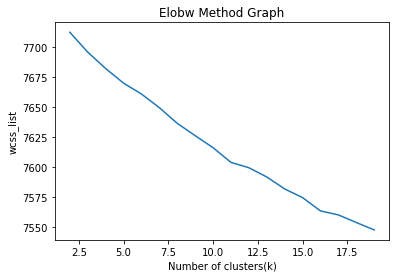

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
list1= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 15.  
for i in range(2, 20):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    c_label = kmeans.fit_predict(X)  
    list1.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, c_label)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg) 
plt.plot(range(2, 20), list1)  
plt.title('Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [72]:
from sklearn.cluster import SpectralClustering
list1= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 15.  
for i in range(2, 15):  
    model = SpectralClustering(n_clusters=i,
                           assign_labels='kmeans')  
    c_label = model.fit_predict(X)  
    #list1.append(model.inertia_)
    silhouette_avg = silhouette_score(X, c_label)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg) 
# plt.plot(range(2, 30), list1)  
# plt.title('Elobw Method Graph')  
# plt.xlabel('Number of clusters(k)')  
# plt.ylabel('wcss_list')  
# plt.show()

For n_clusters = 2 The average silhouette_score is : 0.0013205574219674217
For n_clusters = 3 The average silhouette_score is : 0.0015073245930346732
For n_clusters = 4 The average silhouette_score is : 0.0016666411512211254
For n_clusters = 5 The average silhouette_score is : 0.00215576067006574
For n_clusters = 6 The average silhouette_score is : 0.0026270097447079004
For n_clusters = 7 The average silhouette_score is : 0.0031294296875147946
For n_clusters = 8 The average silhouette_score is : 0.003212296215653143
For n_clusters = 9 The average silhouette_score is : 0.003712904168752679
For n_clusters = 10 The average silhouette_score is : 0.004165227065382316
For n_clusters = 11 The average silhouette_score is : 0.0044113100505765454
For n_clusters = 12 The average silhouette_score is : 0.004629601279710123
For n_clusters = 13 The average silhouette_score is : 0.00461486279067974
For n_clusters = 14 The average silhouette_score is : 0.004921735299862133


In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

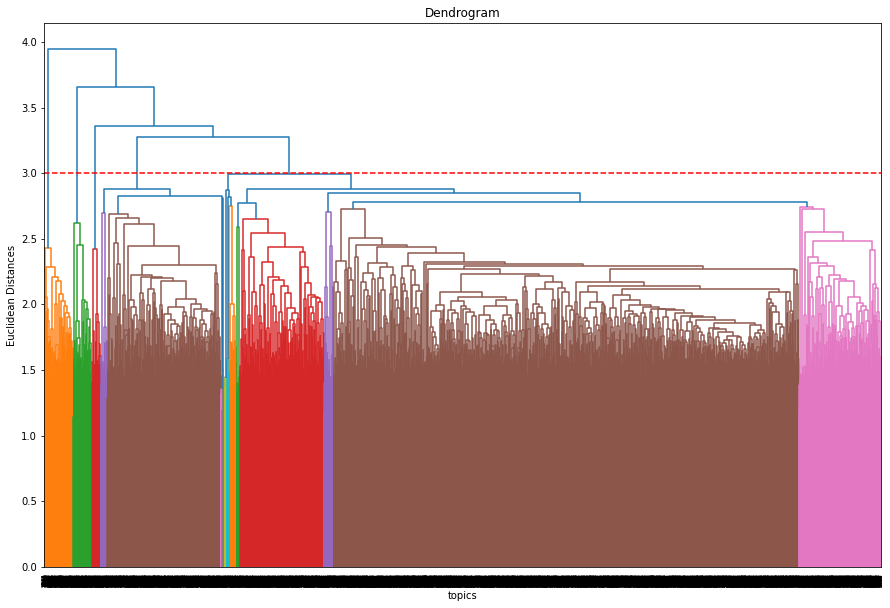

In [74]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_frame, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('topics')
plt.ylabel('Euclidean Distances')
plt.axhline(y=3, color='r', linestyle='--')

In [75]:
# Fitting hierarchical clustering to the mall dataset      
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_frame)

In [76]:
silhouette_avg = silhouette_score(X, y_hc)

In [77]:
silhouette_avg

-0.000912469295613293

**Conclusion**

The trend of TV shows increasing rapidly from 2017, Even in 2021 Netflix has more TV shows than movies. Mostly TV shows are of 2-3 seasons. In both TV series and movies, TV-MA has the highest  number of ratings i.e for mature audience. There is no any TV shows under rating PG, PG_13 and R. In TV-Y and TV-Y7 rating there are more TV shows available than movies. In India, France and Germany drama and comedies  content are most popular.Children movie and kid's tv shows are most popular in Canada, whereas british tv shows are most popular in UK. Anime series and feature are most popular in japan. Romantic and Korean tv series are most popular in south Korea. The months of October, November, December and January had the largest number of films and TV-shows released.  In Asian countries mostly movies rating are under TV-MA and TV-14.  In Nato countries(European countries, America e.t.c) mostly movies rating are under TV-MA and R rating. Very few indian actor work on any Tv shows and series, this means famous indian actor prefer movies more than tv series Out of top 10 country content present in netflix only in Japan and south Korea TV Shows are more popular than movies. K means clustering perform better than hierarchical clustering. average Silhouette score for KNN is 0.0063 where as average Silhouette score for hierarchical clustering is -0.0009.from elbow method , for knn optimal of 16 clusters formed. We cut vertical lines with a horizontal line to obtain the number of clusters in Agglomerative Clustering. There  were five clusters, with an average silhouette score of  -0.0009. LDA has sorted much more similar title.